In [5]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Loading in the california dataset 
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
# Extract the DataFrame containing the data and the target
california_df = california_housing.frame

X = california_df.drop({"MedHouseVal"}, axis = 1)
y = california_df["MedHouseVal"]
#Checking for any missing values in any of the feature columns
print(np.isnan(X).sum())
print(np.isnan(y).sum())

#Using apply function with lambda function
# X["AveRooms"] = X["AveRooms"].apply(lambda x: np.nan if x > 100 else x)

# #Explicitly dropping missing values using the dropna() function
# plt.boxplot(X["AveRooms"].dropna(), labels = ["AveRooms"])

# plt.show()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
0


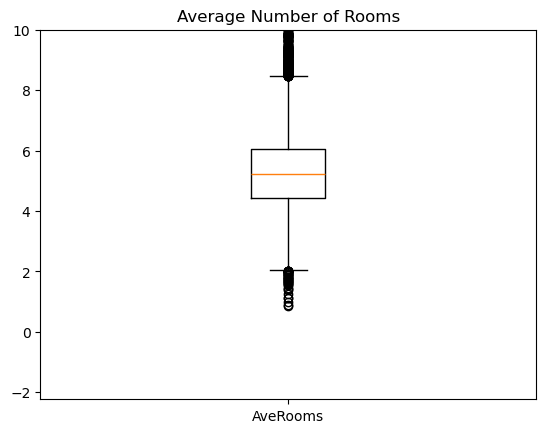

In [7]:
X.loc[X["AveRooms"]> 100] = np.nan 
plt.boxplot(x = X["AveRooms"].dropna(), labels = ["AveRooms"])
plt.ylim(top = 10)
plt.title("Average Number of Rooms")
plt.show()

In [8]:
#Define the standardize functino 
def standardise(x):
    return (x- x.mean())/(x.max()- x.min())

california_df = california_df.apply(standardise, axis = 0)



In [9]:
import numpy as np 

def linear_function(X, theta):
    return np.dot(X, theta)

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def derivative(X, y_true, y_pred):
    return -2/(X.shape[0]) * (np.dot(X.T, (y_true - y_pred)))

def initialize_theta(X):
    return np.zeros(shape = (X.shape[1],1))

def update_theta(theta ,alpha, X, y_true, y_pred):
    grad = derivative(X, y_true, y_pred)
    return theta - alpha*grad



## Batch Gradient Descent

Final theta:  [[ 0.10281191]
 [ 0.02754124]
 [ 0.00305537]
 [-0.00071144]
 [-0.00081883]
 [-0.0002427 ]
 [-0.03498625]
 [-0.01298663]]
Final loss:  0.051508862208874996


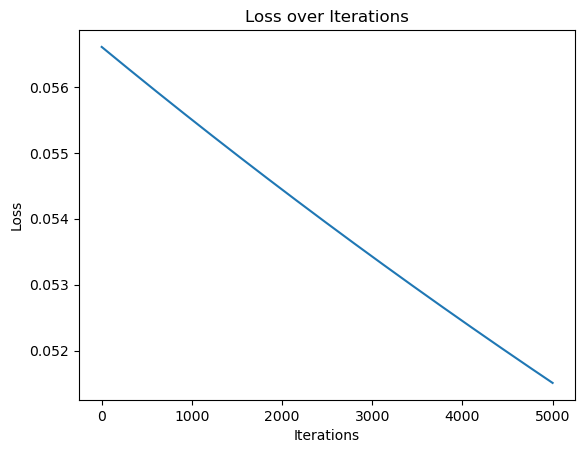

In [10]:
loss_list = []
i = 0 
alpha = 0.0005
iterations = 5000

X = california_df.drop({"MedHouseVal"}, axis = 1).values
y_true = california_df["MedHouseVal"].values.reshape(-1,1)

theta = initialize_theta(X)
for i in range(iterations):
    y_pred = linear_function(X, theta)
    loss = loss_function(y_true, y_pred)
    loss_list.append(loss)
    theta = update_theta(theta, alpha, X, y_true, y_pred)

print("Final theta: ", theta)
print("Final loss: ", loss_list[-1])

plt.plot(range(iterations), loss_list)
plt.xlabel("Iterations")
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

## Stochastic Gradient Descent 

Theta: [[ 0.10280209]
 [ 0.02758123]
 [ 0.00305082]
 [-0.0007143 ]
 [-0.00081338]
 [-0.00024297]
 [-0.03500811]
 [-0.0129982 ]]


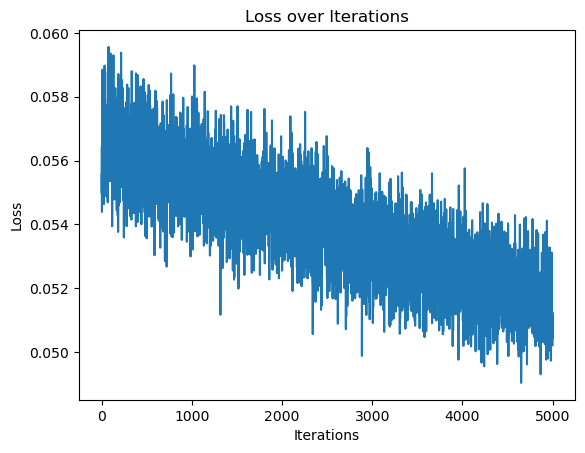

In [11]:
import numpy as np 

def linear_function(X, theta):
    return np.dot(X, theta)

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def derivative(X, y_true, y_pred):
    return -2/(X.shape[0]) * (np.dot(X.T, (y_true - y_pred)))

def initialize_theta(X):
    return np.zeros(shape = (X.shape[1],1))

def update_theta(theta ,alpha, X, y_true, y_pred):
    grad = derivative(X, y_true, y_pred)
    return theta - alpha*grad


loss_list = []
i = 0 
alpha = 0.0005
iterations = 5000

california_df = california_df.apply(standardise, axis = 0)

X = california_df.drop({"MedHouseVal"}, axis = 1)
y_true = california_df["MedHouseVal"]


theta = initialize_theta(X)

for i in range(iterations):
    X_sample = X.sample(n = 7000, replace = True)
    y_true = california_df.loc[X_sample.index, "MedHouseVal"].values.reshape(-1, 1)
    X_sample = X_sample.values
    y_pred = linear_function(X_sample, theta)
    loss = loss_function(y_true, y_pred)
    loss_list.append(loss)
    theta = update_theta(theta, alpha, X_sample, y_true, y_pred)

print("Theta:", theta)
# print("Loss list:", loss_list)

plt.plot(range(iterations), loss_list)
plt.xlabel("Iterations")

plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

